Necessary Imports

In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Taking a look at the dataset 

In [37]:
salesdf  = pd.read_csv('sales_data.csv')
originaldf = salesdf
salesdf.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [63]:
salesdf.shape

(1000, 19)

In [38]:
numerical_cols = salesdf.select_dtypes(include=['number']).columns.tolist()
categorical_cols = salesdf.select_dtypes(exclude=['number']).columns.tolist()
print("Numerical Columns in the dataset : ",numerical_cols)
print("Non Numeric columns in the dataset : ",categorical_cols)

Numerical Columns in the dataset :  ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
Non Numeric columns in the dataset :  ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


Checking for missing values 

In [39]:
salesdf.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [40]:
print(type(salesdf['Date'][0]))
print(type(salesdf['Time'][0]))

<class 'str'>
<class 'str'>


Converting Date and Time to Datetime objects 

In [41]:
salesdf['Date'] = pd.to_datetime(salesdf['Date'])
salesdf['Time'] = pd.to_datetime(salesdf['Time'],format='%H:%M').dt.time

In [42]:
sns.set(style='whitegrid')

In [43]:
numerical_df = salesdf[numerical_cols]
numerical_df.drop(columns=['gross margin percentage'],inplace=True)
correlation_matrix = numerical_df.corr()

C:\Users\anike\AppData\Local\Temp\ipykernel_12988\1873638726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df.drop(columns=['gross margin percentage'],inplace=True)


# Constructing a correlation heatmap 

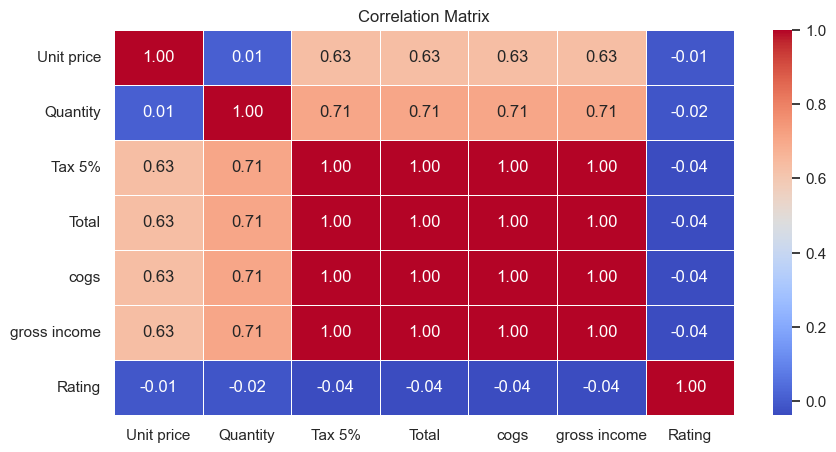

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Product line Analysis

In [45]:
product_line_summary = salesdf.groupby('Product line').agg({
    'gross income' : 'mean',
    'cogs' : 'mean',
    'Unit price' : 'mean',
    'Quantity' : 'mean',
    'Total' : 'mean'
}).reset_index()
product_line_summary.sort_values(by='gross income',ascending=False)



,Product line,gross income,cogs,Unit price,Quantity,Total
4,Home and lifestyle,16.030331,320.606625,55.316937,5.693750,336.636956
5,Sports and travel,15.812630,316.252590,56.993253,5.542169,332.065220
3,Health and beauty,15.411572,308.231447,54.854474,5.618421,323.643020
2,Food and beverages,15.365310,307.306207,56.008851,5.471264,322.671517
0,Electronic accessories,15.220597,304.411941,53.551588,5.711765,319.632538
1,Fashion accessories,14.528062,290.561236,57.153652,5.067416,305.089298


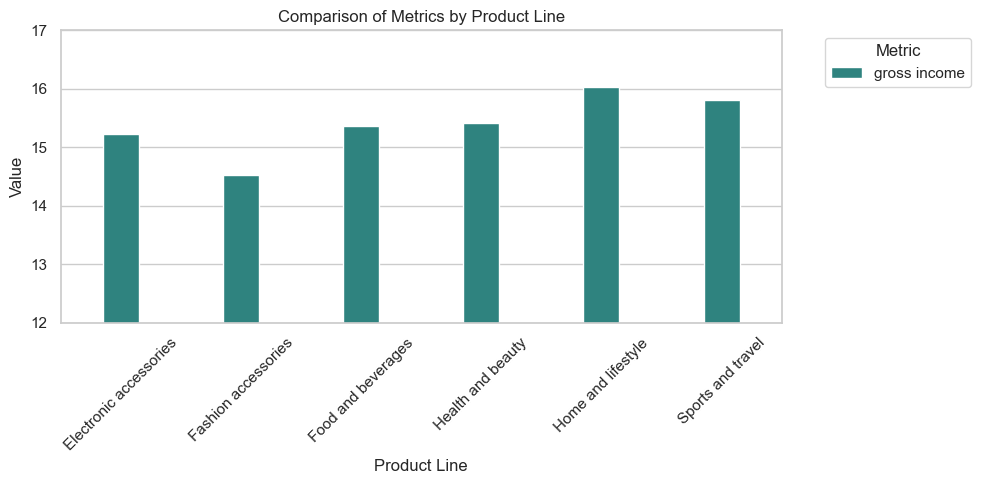

In [46]:
product_line_melted = product_line_summary.melt(id_vars='Product line', 
                                                value_vars=['gross income'], 
                                                var_name='Metric', 
                                                value_name='Value')
plt.figure(figsize=(10, 5))
sns.barplot(x='Product line', y='Value', hue='Metric', data=product_line_melted, palette='viridis',width=0.3)
plt.title('Comparison of Metrics by Product Line')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.xlabel('Product Line')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ylim(12, 17) 
plt.show()

Home and Lifestyle products have the highest average Gross Income and Total sales, indicating strong profitability.
Fashion Accessories have the lowest average Gross Income, suggesting potential for improvement in this category.

Some columns display redundant information. It would be better if they are dropped from the dataset 

## Sales Distribution across days of the week and gender

In [47]:
salesdf['Day']=salesdf['Date'].dt.day_name()

C:\Users\anike\AppData\Local\Temp\ipykernel_12988\1930431467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day',y='gross income',data=salesdf,palette='Set2')


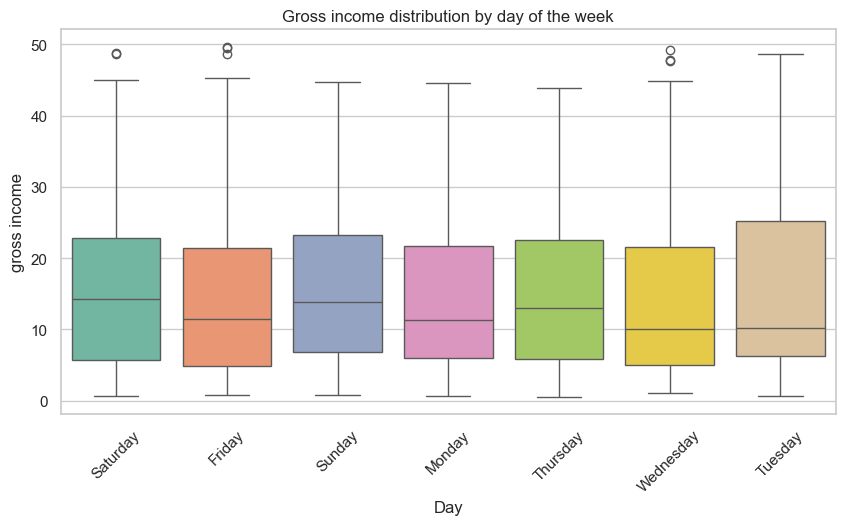

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Day',y='gross income',data=salesdf,palette='Set2')
plt.title('Gross income distribution by day of the week')
plt.xticks(rotation=45)
plt.show()

Reveals variations in Gross Income across different days of the week, indicating potential opportunities for targeted promotions or pricing strategies.

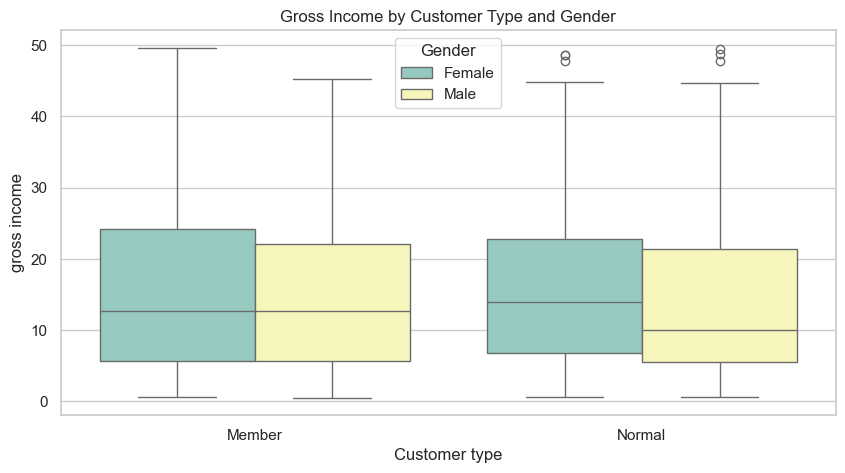

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Customer type',y='gross income',hue='Gender',data=salesdf,palette='Set3')
plt.title('Gross Income by Customer Type and Gender')
plt.show()

 Illustrates that "Members" generally generate higher Gross Income, with some variation by gender, suggesting that membership programs could be further leveraged.

## Payment based analysis

In [50]:
payment_method_summary = salesdf.groupby('Payment').agg({
    'gross income' : 'mean',
    'cogs' : 'mean',
    'Unit price' : 'mean',
    'Quantity' : 'mean',
    'Total' : 'mean'
}).reset_index()
payment_method_summary.sort_values(by='gross income',ascending=False)

,Payment,gross income,cogs,Unit price,Quantity,Total
0,Cash,15.532471,310.649419,56.758983,5.511628,326.181890
1,Credit card,15.429042,308.580836,54.394469,5.536977,324.009878
2,Ewallet,15.181933,303.638667,55.740174,5.484058,318.820600


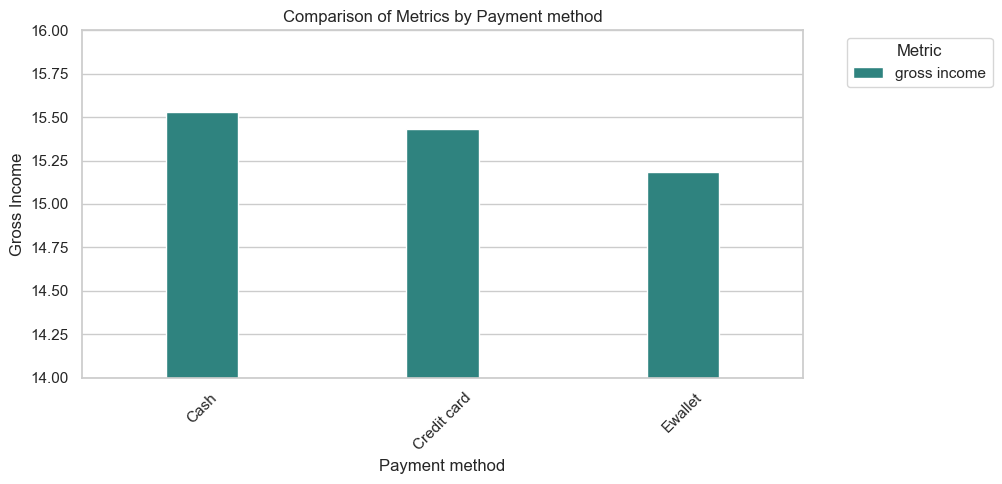

In [51]:
payment_method_melted = payment_method_summary.melt(id_vars='Payment', 
                                                value_vars=['gross income'], 
                                                var_name='Metric', 
                                                value_name='Value')
plt.figure(figsize=(10, 5))
sns.barplot(x='Payment', y='Value', hue='Metric', data=payment_method_melted, palette='viridis',width=0.3)
plt.title('Comparison of Metrics by Payment method')
plt.xticks(rotation=45)
plt.ylabel('Gross Income')
plt.xlabel('Payment method')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ylim(14, 16) 
plt.show()

# Gender based analysis

In [52]:
gender_analysis = salesdf.groupby('Gender').agg({
    'gross income':'mean',
    'cogs':'mean',
    'Unit price':'mean',
    'Quantity':'mean',
    'Total':'mean'
}).reset_index()
gender_analysis.sort_values(by='gross income',ascending=False)

,Gender,gross income,cogs,Unit price,Quantity,Total
0,Female,15.956936,319.138723,55.263952,5.726547,335.095659
1,Male,14.799487,295.989739,56.081944,5.292585,310.789226


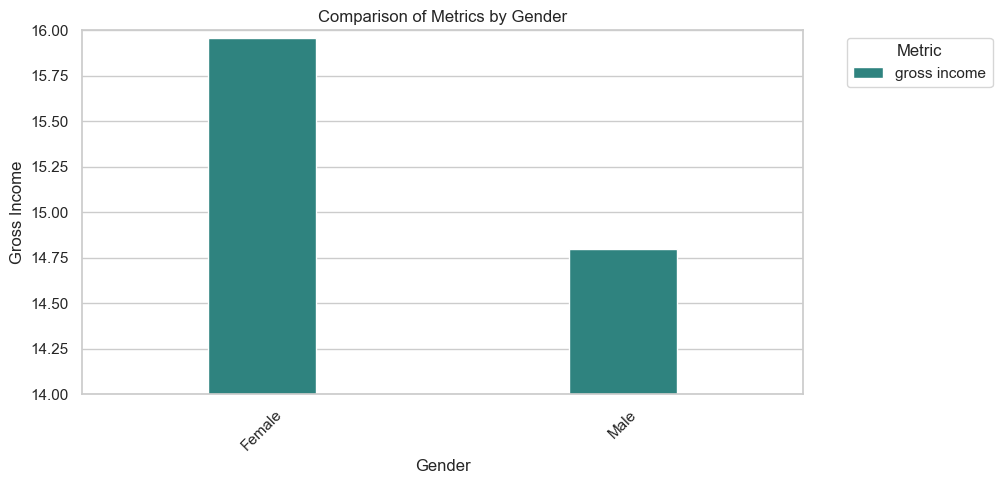

In [53]:
gender_melted = gender_analysis.melt(id_vars='Gender', 
                                                value_vars=['gross income'], 
                                                var_name='Metric', 
                                                value_name='Value')
plt.figure(figsize=(10, 5))
sns.barplot(x='Gender', y='Value', hue='Metric', data=gender_melted, palette='viridis',width=0.3)
plt.title('Comparison of Metrics by Gender')
plt.xticks(rotation=45)
plt.ylabel('Gross Income')
plt.xlabel('Gender')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ylim(14, 16) 
plt.show()

# Daily Sales Analysis

In [54]:
daily_sales_analysis = salesdf.groupby('Day').agg({
    'gross income':'mean',
    'cogs':'mean',
    'Unit price':'mean',
    'Quantity':'mean',
    'Total':'mean'
}).reset_index()
daily_sales_analysis.sort_values(by='gross income',ascending=False)

,Day,gross income,cogs,Unit price,Quantity,Total
2,Saturday,16.295241,325.904817,56.913049,5.603659,342.200058
3,Sunday,15.917613,318.352256,54.517970,5.849624,334.269868
4,Thursday,15.648464,312.969275,56.959058,5.471014,328.617739
5,Tuesday,15.516047,310.320949,54.837215,5.455696,325.836997
0,Friday,15.048421,300.968417,55.097266,5.453237,316.016838
6,Wednesday,14.562483,291.249650,53.764685,5.594406,305.812133
1,Monday,14.437744,288.754880,57.728000,5.104000,303.192624


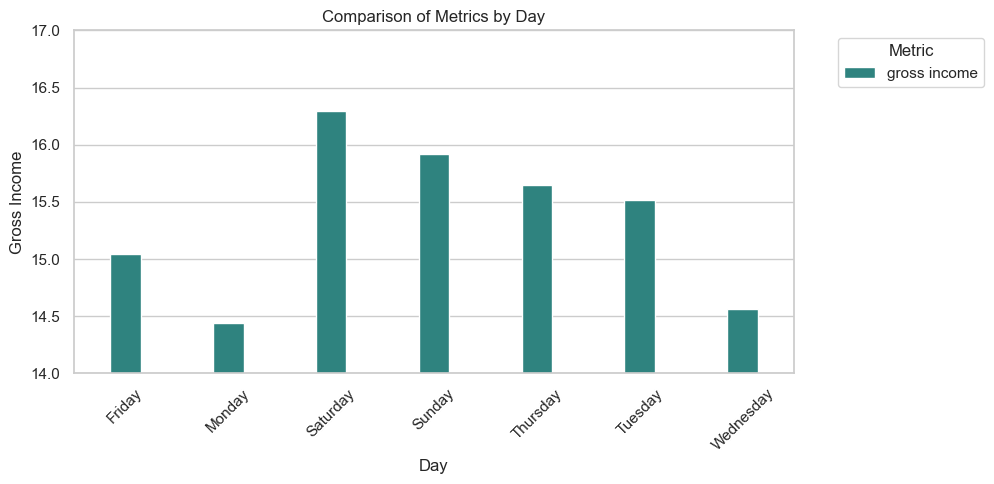

In [55]:
daily_melted = daily_sales_analysis.melt(id_vars='Day', 
                                                value_vars=['gross income'], 
                                                var_name='Metric', 
                                                value_name='Value')
plt.figure(figsize=(10, 5))
sns.barplot(x='Day', y='Value', hue='Metric', data=daily_melted, palette='viridis',width=0.3)
plt.title('Comparison of Metrics by Day')
plt.xticks(rotation=45)
plt.ylabel('Gross Income')
plt.xlabel('Day')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ylim(14, 17) 
plt.show()

## City based analysis

In [56]:
citybasedanalysis = salesdf.groupby('City').agg({
    'gross income':'mean',
    'Total' : 'mean'
}).reset_index()
citybasedanalysis.sort_values(by='gross income',ascending=False)

,City,gross income,Total
1,Naypyitaw,16.052367,337.099715
0,Mandalay,15.232024,319.872506
2,Yangon,14.874001,312.354031


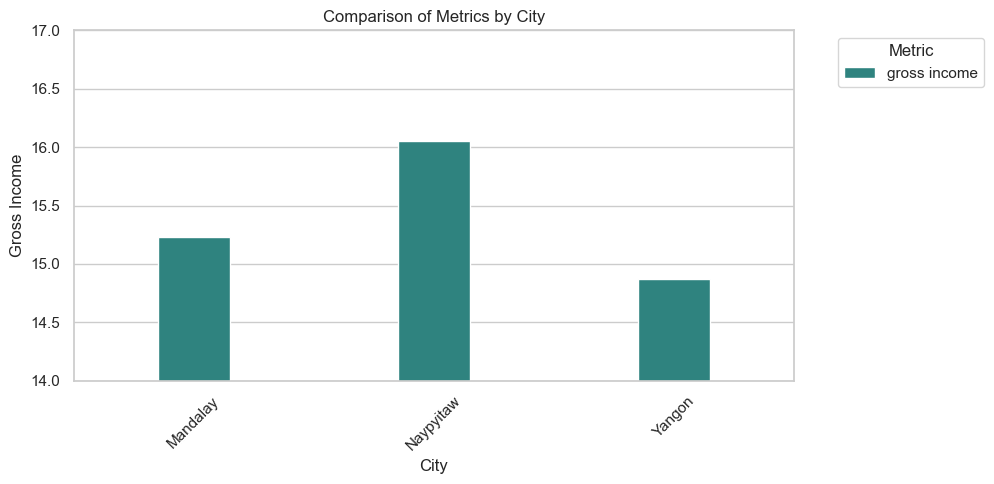

In [57]:
city_melted = citybasedanalysis.melt(id_vars='City',
                                     value_vars=['gross income'],
                                     var_name='Metric',
                                     value_name='Value')
plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='Value', hue='Metric', data=city_melted, palette='viridis',width=0.3)
plt.title('Comparison of Metrics by City')
plt.xticks(rotation=45)
plt.ylabel('Gross Income')
plt.xlabel('City')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ylim(14, 17) 
plt.show()

## Member based analysis

In [58]:
memberbasedanalysis = salesdf.groupby('Customer type').agg({
    'gross income':'mean',
    'Total':'mean'
}).reset_index()
memberbasedanalysis.sort_values(ascending=False,by='gross income')

,Customer type,gross income,Total
0,Member,15.609110,327.791305
1,Normal,15.148707,318.122856


## Branch based analysis

In [59]:
branchbasedanalysis = salesdf.groupby('Branch').agg({
    'gross income':'mean',
    'Total':'mean'
}).reset_index()

branchbasedanalysis.sort_values(ascending=False,by='gross income')

,Branch,gross income,Total
2,C,16.052367,337.099715
1,B,15.232024,319.872506
0,A,14.874001,312.354031


## Time based analysis

In [62]:
salesdf['Hour'] = salesdf['Time'].apply(lambda x: x.hour)
average_gross_income_by_hour = salesdf.groupby('Hour')['gross income'].mean()
max_avg_gross_income_hour = average_gross_income_by_hour.idxmax()
max_avg_gross_income = average_gross_income_by_hour.max()

print(f"The hour with the maximum average gross income is {max_avg_gross_income_hour}:00 with an average gross income of {max_avg_gross_income:.2f}")

The hour with the maximum average gross income is 14:00 with an average gross income of 17.69


## Final DF

In [61]:
finaldf = salesdf.drop(columns=['Invoice ID','Quantity','Tax 5%','Payment','gross margin percentage'])
finaldf.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Total,Date,Time,cogs,gross income,Rating,Day
0,A,Yangon,Member,Female,Health and beauty,74.69,548.9715,2019-01-05,13:08:00,522.83,26.1415,9.1,Saturday
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,80.2200,2019-03-08,10:29:00,76.40,3.8200,9.6,Friday
